In [11]:
import cobra
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
carveme_model = cobra.io.read_sbml_model("carveme_model.xml")

Adding exchange reaction EX_2obut_e with default bounds for boundary metabolite: 2obut_e.
Adding exchange reaction EX_LalaDgluMdap_e with default bounds for boundary metabolite: LalaDgluMdap_e.
Adding exchange reaction EX_ac_e with default bounds for boundary metabolite: ac_e.
Adding exchange reaction EX_acald_e with default bounds for boundary metabolite: acald_e.
Adding exchange reaction EX_acgam_e with default bounds for boundary metabolite: acgam_e.
Adding exchange reaction EX_adn_e with default bounds for boundary metabolite: adn_e.
Adding exchange reaction EX_agm_e with default bounds for boundary metabolite: agm_e.
Adding exchange reaction EX_ala__D_e with default bounds for boundary metabolite: ala__D_e.
Adding exchange reaction EX_amp_e with default bounds for boundary metabolite: amp_e.
Adding exchange reaction EX_anhgm_e with default bounds for boundary metabolite: anhgm_e.
Adding exchange reaction EX_arg__L_e with default bounds for boundary metabolite: arg__L_e.
Adding exc

In [3]:
len(carveme_model.reactions)

747

In [11]:
daniel_model = cobra.io.load_json_model("my_model_with_biomass_aa_Feb4_3pm.json")

In [12]:
len(daniel_model.reactions)

1413

In [4]:
carveme_model.reactions[0].annotation

{'sbo': 'SBO:0000627'}

In [5]:
# How many reactions have any model seed reaction annotation?
model_seed_reactions = [r for r in carveme_model.reactions if "seed.reaction" in r.annotation]
len(model_seed_reactions)

458

# How many reactions have multiple ModelSEED IDs

In [6]:
rxns_w_multi_ms_ids = [r for r in carveme_model.reactions if ("seed.reaction" in r.annotation) and (type(r.annotation['seed.reaction']) == list)]

In [7]:
len(rxns_w_multi_ms_ids)

82

In [8]:
# How many reactions total have a 
458+82

540

In [9]:
[r.annotation['seed.reaction'] for r in rxns_w_multi_ms_ids]

[['rxn08032', 'rxn08033', 'rxn09700', 'rxn13212'],
 ['rxn05485', 'rxn08041'],
 ['rxn05318', 'rxn08068'],
 ['rxn00851', 'rxn13802'],
 ['rxn05303', 'rxn09783'],
 ['rxn08154', 'rxn13228'],
 ['rxn00416', 'rxn11214'],
 ['rxn05217', 'rxn09781', 'rxn09825', 'rxn13233'],
 ['rxn08173', 'rxn10042'],
 ['rxn00137', 'rxn11357'],
 ['rxn05539', 'rxn08210'],
 ['rxn05467',
  'rxn08237',
  'rxn08238',
  'rxn09706',
  'rxn09775',
  'rxn09821',
  'rxn09860',
  'rxn09876'],
 ['rxn05467',
  'rxn08237',
  'rxn08238',
  'rxn09706',
  'rxn09775',
  'rxn09821',
  'rxn09860',
  'rxn09876'],
 ['rxn05467',
  'rxn08237',
  'rxn08238',
  'rxn09706',
  'rxn09775',
  'rxn09821',
  'rxn09860',
  'rxn09876'],
 ['rxn10832', 'rxn13243', 'rxn13244'],
 ['rxn08241', 'rxn08242', 'rxn10474'],
 ['rxn00412', 'rxn11276'],
 ['rxn08287', 'rxn10806'],
 ['rxn08288', 'rxn10112', 'rxn12494'],
 ['rxn08234', 'rxn10473'],
 ['rxn05494', 'rxn08301'],
 ['rxn05494', 'rxn08301'],
 ['rxn05292', 'rxn08492'],
 ['rxn03975', 'rxn13930', 'rxn13939']

In [10]:
rxns_w_multi_ms_ids[12].annotation['seed.reaction']

['rxn05467',
 'rxn08237',
 'rxn08238',
 'rxn09706',
 'rxn09775',
 'rxn09821',
 'rxn09860',
 'rxn09876']

# Compare the reactions in the CarveMe model vs in Daniel's Manual Reconstruction

In [13]:
# Get lists of the unique model seed reaction IDs
# For Daniel's model made with ModelSEED, can just get the reaction ID
daniel_rxns = set([r.id for r in daniel_model.reactions])

In [19]:
# For the CarveMe model need to unpack all of the annotation fields
all_ms_ids = []
for r in carveme_model.reactions:
    if "seed.reaction" in r.annotation:
        if type(r.annotation['seed.reaction']) == str:
            all_ms_ids.append(r.annotation['seed.reaction'])
        elif type(r.annotation['seed.reaction']) == list:
            all_ms_ids.extend(r.annotation['seed.reaction'])
carveme_rxns = set(all_ms_ids)

In [22]:
# Get the different comparisons
intersection_set = carveme_rxns.intersection(daniel_rxns)
unique_daniel_rxns = daniel_rxns.difference(carveme_rxns)
unique_carveme_rxns = carveme_rxns.difference(daniel_rxns)


In [23]:
len(intersection_set)

228

In [24]:
len(unique_daniel_rxns)

1185

In [25]:
len(unique_carveme_rxns)

333

In [27]:
unique_daniel_rxns

{'rxn02185',
 'rxn04810',
 'rxn00302',
 'rxn02400',
 'rxn20661',
 'rxn15949',
 'rxn32777',
 'rxn01416',
 'rxn40257',
 'rxn00679',
 'rxn38263',
 'rxn15271',
 'rxn38254',
 'rxn07264',
 'rxn15435',
 'rxn11838',
 'rxn00011',
 'rxn00598',
 'rxn01129',
 'rxn00194',
 'rxn02888',
 'rxn02525',
 'rxn15114',
 'rxn31255',
 'rxn00869',
 'rxn04832',
 'rxn05054',
 'rxn08044',
 'rxn00107',
 'rxn01231',
 'rxn02288',
 'rxn36857',
 'rxn30983',
 'rxn38832',
 'rxn01860',
 'rxn15142',
 'rxn30088',
 'rxn03159',
 'rxn03141',
 'EX_cpd00075_e',
 'rxn19040',
 'rxn00077',
 'rxn38708',
 'rxn34708',
 'rxn07883',
 'rxn06281',
 'rxn03384',
 'rxn00566',
 'rxn11968',
 'rxn01332',
 'rxn05465',
 'rxn01520',
 'rxn06088',
 'rxn00855',
 'rxn08907',
 'rxn16231',
 'rxn00868',
 'rxn06823',
 'rxn04887',
 'rxn05124',
 'rxn35241',
 'rxn35560',
 'rxn01122',
 'rxn06600',
 'EX_cpd00067_e',
 'rxn03068',
 'rxn06522',
 'rxn01043',
 'rxn39708',
 'rxn00183',
 'rxn30908',
 'rxn16826',
 'rxn00615',
 'rxn00363',
 'rxn32060',
 'rxn00874',
 '

In [26]:
unique_carveme_rxns

{'rxn00001',
 'rxn00007',
 'rxn00010',
 'rxn00064',
 'rxn00102',
 'rxn00106',
 'rxn00114',
 'rxn00193',
 'rxn00265',
 'rxn00282',
 'rxn00299',
 'rxn00359',
 'rxn00469',
 'rxn00471',
 'rxn00609',
 'rxn00704',
 'rxn00740',
 'rxn00784',
 'rxn00835',
 'rxn00877',
 'rxn00899',
 'rxn00905',
 'rxn00914',
 'rxn00943',
 'rxn01208',
 'rxn01217',
 'rxn01222',
 'rxn01258',
 'rxn01265',
 'rxn01345',
 'rxn01361',
 'rxn01452',
 'rxn01505',
 'rxn01538',
 'rxn01644',
 'rxn01833',
 'rxn01986',
 'rxn02666',
 'rxn02831',
 'rxn02832',
 'rxn03168',
 'rxn03975',
 'rxn04675',
 'rxn04783',
 'rxn05144',
 'rxn05149',
 'rxn05151',
 'rxn05153',
 'rxn05164',
 'rxn05168',
 'rxn05169',
 'rxn05179',
 'rxn05213',
 'rxn05217',
 'rxn05219',
 'rxn05226',
 'rxn05292',
 'rxn05293',
 'rxn05303',
 'rxn05310',
 'rxn05313',
 'rxn05315',
 'rxn05318',
 'rxn05319',
 'rxn05466',
 'rxn05467',
 'rxn05468',
 'rxn05485',
 'rxn05494',
 'rxn05496',
 'rxn05497',
 'rxn05519',
 'rxn05522',
 'rxn05523',
 'rxn05539',
 'rxn05571',
 'rxn05578',

In [28]:
intersection_set

{'rxn00048',
 'rxn00063',
 'rxn00076',
 'rxn00085',
 'rxn00086',
 'rxn00100',
 'rxn00105',
 'rxn00117',
 'rxn00119',
 'rxn00122',
 'rxn00126',
 'rxn00137',
 'rxn00138',
 'rxn00141',
 'rxn00147',
 'rxn00148',
 'rxn00154',
 'rxn00159',
 'rxn00165',
 'rxn00173',
 'rxn00175',
 'rxn00178',
 'rxn00182',
 'rxn00184',
 'rxn00189',
 'rxn00191',
 'rxn00192',
 'rxn00198',
 'rxn00225',
 'rxn00239',
 'rxn00251',
 'rxn00256',
 'rxn00290',
 'rxn00293',
 'rxn00301',
 'rxn00313',
 'rxn00336',
 'rxn00337',
 'rxn00338',
 'rxn00342',
 'rxn00346',
 'rxn00350',
 'rxn00361',
 'rxn00364',
 'rxn00367',
 'rxn00392',
 'rxn00405',
 'rxn00412',
 'rxn00414',
 'rxn00416',
 'rxn00420',
 'rxn00423',
 'rxn00436',
 'rxn00438',
 'rxn00452',
 'rxn00461',
 'rxn00463',
 'rxn00474',
 'rxn00490',
 'rxn00500',
 'rxn00503',
 'rxn00527',
 'rxn00533',
 'rxn00604',
 'rxn00623',
 'rxn00649',
 'rxn00650',
 'rxn00670',
 'rxn00701',
 'rxn00710',
 'rxn00711',
 'rxn00727',
 'rxn00747',
 'rxn00748',
 'rxn00781',
 'rxn00789',
 'rxn00790',

# Look at Reaction Scores

In [4]:
# Load the reaction scores TSV
reaction_scores = pd.read_csv("carveme_model_reaction_scores.tsv",
                              sep="\t",
                              header=0)

In [6]:
# Compare the number of reactions in the model as in the scores file
print(f'Model: {len(carveme_model.reactions)}')
print(f'Scores: {len(reaction_scores)}')

Model: 744
Scores: 399


In [9]:
carveme_model.reactions.ACALDt

Reaction identifier,ACALDt
Name,Acetaldehyde reversible transport
Memory address,0x17e2f9480
Stoichiometry,acald_e <=> acald_c Acetaldehyde <=> Acetaldehyde
GPR,spontaneous
Lower bound,-1000.0
Upper bound,1000.0


In [15]:
# Check that all of the reactions in the scores file are in the model
# But remove the R_ from the beginning of the reaction ID
# First make sure that all reactions actually start with "R_"
all_rxns_start_with_R = all([r.startswith("R_") for r in reaction_scores['reaction']])
if not all_rxns_start_with_R:
    print("FREAK OUT")
# Then  actaully do it
scores_rxns = set([r[2:] for r in reaction_scores['reaction']])

In [16]:
# Make sure that all of the reactions in the scores file are in the model
scores_rxns.issubset([r.id for r in carveme_model.reactions])

False

In [22]:
# See which reactions in the scores file are not in the model
unique_scores_rxns = scores_rxns.difference([r.id for r in carveme_model.reactions])
len(unique_scores_rxns)

89

In [23]:
unique_scores_rxns

{'1P2CBXLCYCL',
 '3HAD80',
 '5DOAN',
 'AADSACYCL',
 'AALDCDLsi',
 'ACALDtpp',
 'ACMUMptspp',
 'AGM3PA',
 'AGM4PA',
 'AHCYSNS',
 'AM3PA',
 'AM4PA',
 'AMMQLT8',
 'AOXHEXCYCL',
 'AP4AH',
 'APRAUR',
 'CBMD',
 'CMCBTFexs',
 'COt_1',
 'CPGNexs',
 'CYANSTpp',
 'Cotpp',
 'DATPHs',
 'DBTS',
 'DHBSZ3FEexs',
 'DHGLYH',
 'DHNPA2r',
 'DHPPDA2',
 'DHPS2',
 'DHPTDCs',
 'DHPTDCs2',
 'E4PD',
 'ETOHtrpp',
 'FACOAE100',
 'FACOAE140',
 'FACOAE181',
 'FALDtpp',
 'FALGTHLs',
 'FE3DCITexs',
 'FE3HOXexs',
 'FEENTERexs',
 'FEENTERtonex',
 'FEOXAMexs',
 'FESD1s',
 'FESD2s',
 'FLVR',
 'FLVRx',
 'G5SADs',
 'GTPHs',
 'H2CO3D2',
 'H2O2tex',
 'H2St1pp',
 'H2tpp',
 'HMBS',
 'HMPK1',
 'MALTptspp',
 'MCBTFUexs',
 'MCOATA',
 'MTAN',
 'MTHTHFSs',
 'N2Otpp',
 'NADHHR',
 'NADHHS',
 'NADPHHR',
 'NADPHHS',
 'NOVBCNtex',
 'NOtpp',
 'OHCUDC2',
 'PA160abcpp',
 'PE140abcpp',
 'PE160abcpp',
 'PE180abcpp',
 'PE181abcpp',
 'PGP181abcpp',
 'PGPP181pp',
 'PROGLYabcpp',
 'SALCHS2FEexs',
 'SALCHS4FEexs',
 'SUCptspp',
 'TCYNTtpp',
 'THR

In [28]:
carveme_model.reactions.AGM3PApp

Reaction identifier,AGM3PApp
Name,N-Acetyl-D-glucosamine(anhydrous)N-Acetylmuramyl-tripeptide amidase (periplasm)
Memory address,0x17e34e1a0
Stoichiometry,"anhgm3p_p + h2o_p --> LalaDgluMdap_p + anhgm_p N-Acetyl-D-glucosamine(anhydrous)N-Acetylmuramyl-tripeptide + H2O H2O --> L-alanine-D-glutamate-meso-2,6-diaminoheptanedioate + N-Acetyl-D-glucosamine(anhydrous)N-Acetylmuramic acid"
GPR,
Lower bound,0.0
Upper bound,1000.0


# Look at GPRs

## How to check if a GPR is empty

In [55]:
# Test with one we know is empty
carveme_model.reactions.AGM3PApp.gene_name_reaction_rule == ''

True

In [57]:
# Test with one we know has a real GPR
carveme_model.reactions.ACCOAC.gene_name_reaction_rule == ''

False

## Find reactions with a GPR

In [76]:
rxns_w_gpr = [r for r in carveme_model.reactions if r.gene_name_reaction_rule != '']
rxns_wo_gpr = [r for r in carveme_model.reactions if r.gene_name_reaction_rule == '']

In [75]:
len(rxns_w_gpr)

309

In [77]:
len(rxns_wo_gpr)

435

In [65]:
# How many reactions are spontaneous?
len([r for r in carveme_model.reactions if r.gene_name_reaction_rule == 'G_spontaneous'])

26

In [78]:
# How many of the reactions that have no GPR are transport or exchange reactions
no_gpr_ex_rxns = [r for r in rxns_wo_gpr if r.id.startswith("EX_")]
len(no_gpr_ex_rxns)

80

In [79]:
# Are there any reactions that have a GPR but aren't in the scores file?
gpr_rxns_not_in_scores = [r for r in rxns_w_gpr if r.id not in scores_rxns]
len(gpr_rxns_not_in_scores)

0

# Look at Ensemble Consensus

I'm assuming that the way to calculate the "consensus metris" is to do $\frac{n_{\text{reactions with all 1s in ensemble}}}{n_{\text{reactions}}}$

In [6]:
# Load the ensemble model
ensemble_model = cobra.io.read_sbml_model("carveme_ensemble.xml")

Adding exchange reaction EX_12ppd__R_e with default bounds for boundary metabolite: 12ppd__R_e.
Adding exchange reaction EX_12ppd__S_e with default bounds for boundary metabolite: 12ppd__S_e.
Adding exchange reaction EX_13ppd_e with default bounds for boundary metabolite: 13ppd_e.
Adding exchange reaction EX_23camp_e with default bounds for boundary metabolite: 23camp_e.
Adding exchange reaction EX_23dappa_e with default bounds for boundary metabolite: 23dappa_e.
Adding exchange reaction EX_26dap__M_e with default bounds for boundary metabolite: 26dap__M_e.
Adding exchange reaction EX_2dhglcn_e with default bounds for boundary metabolite: 2dhglcn_e.
Adding exchange reaction EX_2h3mp_e with default bounds for boundary metabolite: 2h3mp_e.
Adding exchange reaction EX_2hxmp_e with default bounds for boundary metabolite: 2hxmp_e.
Adding exchange reaction EX_2mbald_e with default bounds for boundary metabolite: 2mbald_e.
Adding exchange reaction EX_2mpa_e with default bounds for boundary me

In [107]:
ensemble_model.reactions.get_by_id('12DGR120tipp')

Reaction identifier,12DGR120tipp
Name,"1,2 diacylglycerol transport via flipping (periplasm to cytoplasm, n-C12:0)"
Memory address,0x1153e7910
Stoichiometry,"12dgr120_p --> 12dgr120_c 1,2-Diacyl-sn-glycerol (didodecanoyl, n-C12:0) --> 1,2-Diacyl-sn-glycerol (didodecanoyl, n-C12:0)"
GPR,
Lower bound,0.0
Upper bound,1000.0


In [106]:
ensemble_model.reactions.get_by_id('12DGR120tipp').annotation

{'sbo': 'SBO:0000185',
 'metanetx.reaction': 'MNXR94675',
 'ensemble_state': 'ENSEMBLE_STATE:0 1 1 0 1 0 1 0 1 1 0 0 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1 0 1 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 0 0 0'}

In [95]:
[int(score) for score in ensemble_model.reactions.get_by_id('12DGR120tipp').annotation['ensemble_state'].split(':')[1].split(' ')]

[0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0]

In [101]:
# Subset the ensemble model to only include reactions with the ensemble state annotation
# I assume everything else was added by COBRApy
ensemble_rxns = [r for r in ensemble_model.reactions if 'ensemble_state' in r.annotation]
len(ensemble_rxns)

2409

In [102]:
# Get the number of reactions that have all 1s in the ensemble state
all_ones = [r for r in ensemble_rxns if all([int(score) == 1 for score in r.annotation['ensemble_state'].split(':')[1].split(' ')])]
len(all_ones)

200

In [103]:
consensus_metric = len(all_ones) / len(ensemble_rxns)
print(f'Consensus metric: {consensus_metric}')

Consensus metric: 0.08302200083022


In [17]:
# Function to calculate the consensus metric
def compute_consensus_score_from_sbml(ensemble_model):
    """
    Compute the consensus score C for an SBML model where reaction ensemble states 
    are stored in reaction annotations.
    
    Parameters:
        ensemble_model (cobra.Model): The COBRApy model with reaction ensemble annotations.
    
    Returns:
        float: The consensus score C.
    """
    reactions = ensemble_model.reactions
    reaction_frequencies = []
    rxn_freq_w_gpr = []
    rxn_freq_wo_gpr = []
    E = None  # Ensemble size (we'll determine it dynamically)

    for reaction in reactions:
        try:
            # Extract the binary ensemble presence/absence state
            ensemble_state = reaction.annotation['ensemble_state']
            state_values = [int(score) for score in ensemble_state.split(':')[1].split(' ')]

            if E is None:
                E = len(state_values)  # Set ensemble size based on first reaction

            if len(state_values) != E:
                raise ValueError(f"Inconsistent ensemble size for reaction {reaction.id}")

            # Compute frequency of reaction presence across the ensemble
            reaction_frequency = sum(state_values) / E

            # Add to the list of reaction frequencies
            reaction_frequencies.append(reaction_frequency)

            # Add the list for with or without GPR
            if reaction.gene_name_reaction_rule == '' or reaction.gene_name_reaction_rule == 'G_spontaneous':
                rxn_freq_wo_gpr.append(reaction_frequency)
            else:
                rxn_freq_w_gpr.append(reaction_frequency)

        except KeyError:
            print(f"Warning: Reaction {reaction.id} has no ensemble_state annotation. Skipping.")
    
    if not reaction_frequencies:
        raise ValueError("No valid reaction ensemble data found.")

    # Compute consensus score as the geometic mean of reaction frequencies
    # This is not what the equation in the paper says, but maybe it's a typo?
    C = np.power(np.prod(reaction_frequencies), 1/len(reaction_frequencies))

    return C, reaction_frequencies, rxn_freq_w_gpr, rxn_freq_wo_gpr

In [18]:
# Example usage (assuming `ensemble_model` is already loaded as a COBRApy model)
consensus_score, reaction_frequencies, rxn_freq_w_gpr, rxn_freq_wo_gpr = compute_consensus_score_from_sbml(ensemble_model)
print(f"Consensus Score: {consensus_score:.4f}")

Consensus Score: 0.0000


## Plot reaction frequencies

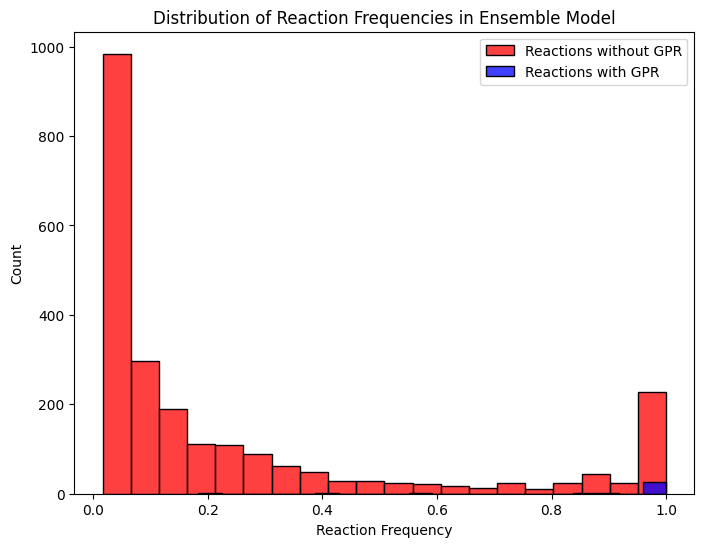

In [19]:
# Plot the distribution of reaction frequencies for reactions with and without GPR in different colors
plt.figure(figsize=(8, 6))
# sns.histplot(reaction_frequencies, bins=20, color='gray', label='All Reactions')
sns.histplot(rxn_freq_wo_gpr, bins=20, color='red', label='Reactions without GPR')
sns.histplot(rxn_freq_w_gpr, bins=20, color='blue',label='Reactions with GPR')
plt.xlabel('Reaction Frequency')
plt.ylabel('Count')
plt.title('Distribution of Reaction Frequencies in Ensemble Model')
plt.legend()
plt.show()

Adding exchange reaction EX_12ppd__R_e with default bounds for boundary metabolite: 12ppd__R_e.
Adding exchange reaction EX_12ppd__S_e with default bounds for boundary metabolite: 12ppd__S_e.
Adding exchange reaction EX_15dap_e with default bounds for boundary metabolite: 15dap_e.
Adding exchange reaction EX_23camp_e with default bounds for boundary metabolite: 23camp_e.
Adding exchange reaction EX_23cgmp_e with default bounds for boundary metabolite: 23cgmp_e.
Adding exchange reaction EX_23cump_e with default bounds for boundary metabolite: 23cump_e.
Adding exchange reaction EX_23dappa_e with default bounds for boundary metabolite: 23dappa_e.
Adding exchange reaction EX_25dkglcn_e with default bounds for boundary metabolite: 25dkglcn_e.
Adding exchange reaction EX_2ameph_e with default bounds for boundary metabolite: 2ameph_e.
Adding exchange reaction EX_2ddglcn_e with default bounds for boundary metabolite: 2ddglcn_e.
Adding exchange reaction EX_2m35mdntha_e with default bounds for b

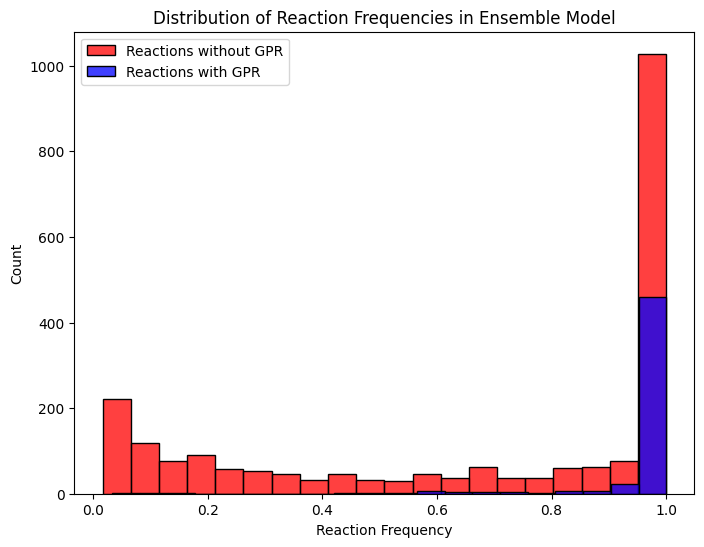

In [20]:
## Make the same plot for the diamond ensemble model
diamond_model = cobra.io.read_sbml_model("carveme_ensemble_diamond.xml")
diamond_consensus_score, diamond_reaction_frequencies, diamond_rxn_freq_w_gpr, diamond_rxn_freq_wo_gpr = compute_consensus_score_from_sbml(diamond_model)

# Plot the distribution of reaction frequencies for reactions with and without GPR in different colors
plt.figure(figsize=(8, 6))
# sns.histplot(reaction_frequencies, bins=20, color='gray', label='All Reactions')
sns.histplot(diamond_rxn_freq_wo_gpr, bins=20, color='red', label='Reactions without GPR')
sns.histplot(diamond_rxn_freq_w_gpr, bins=20, color='blue',label='Reactions with GPR')
plt.xlabel('Reaction Frequency')
plt.ylabel('Count')
plt.title('Distribution of Reaction Frequencies in Ensemble Model')
plt.legend()
plt.show()



In [21]:
diamond_consensus_score

0.0